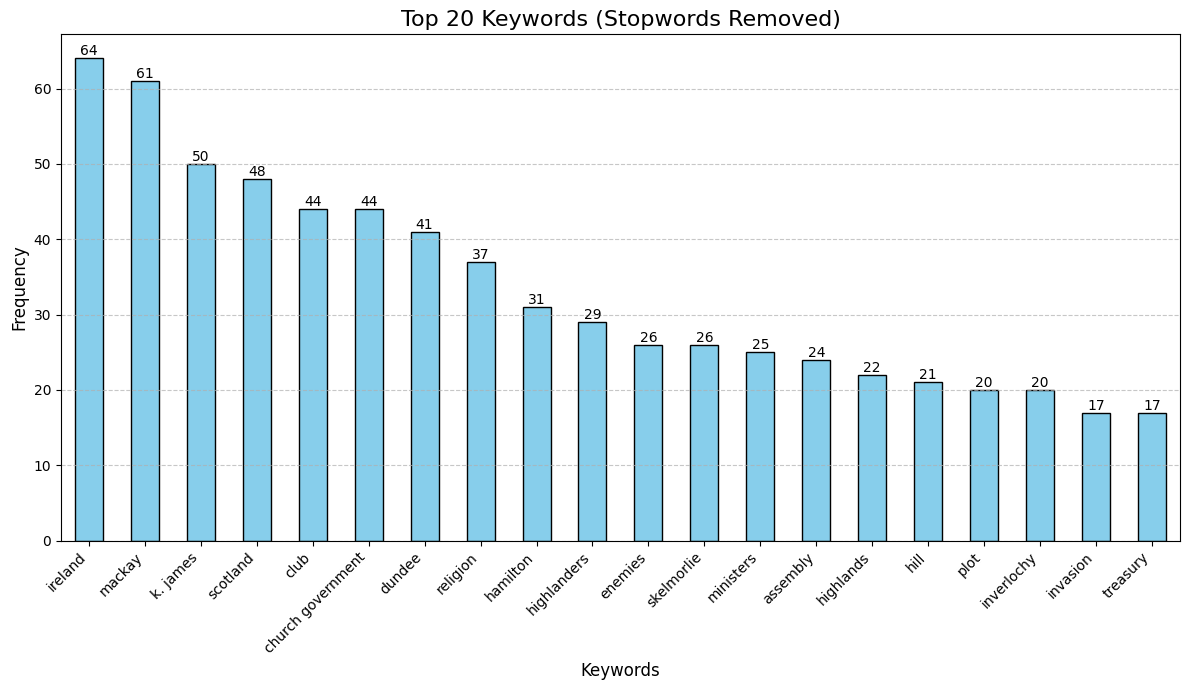

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


network_df= pd.read_csv("https://raw.githubusercontent.com/gilliansmac92/networkingletters/main/data/keywords-separated.csv")

# Simple custom stopword list (can also use nltk as above)
stop_words = set([
    'king', 'service', 'parliament', 'friendship', 'duty', 'favor', 'honor', 'loyalty', 'honesty', 'appointment', 'interest', 'friends', 'guilty', 'church', 'privy council'
])

# Your columns
keywords_columns = ['Keywords 1', 'Keywords 2', 'Keywords 3', 'Keywords 4', 'Keywords 5', 'Keywords 6', 'Keywords 7']

# Stack and filter keywords
keywords = network_df[keywords_columns].stack().dropna()
keywords = keywords.astype(str).str.lower()  # Lowercase for consistent comparison

# Remove stopwords
filtered_keywords = keywords[~keywords.isin(stop_words)]

# Count frequencies
keyword_frequencies = filtered_keywords.value_counts()
top_keywords = keyword_frequencies.head(20)

# Plot
plt.figure(figsize=(12, 7))
ax = top_keywords.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 20 Keywords (Stopwords Removed)', fontsize=16)
plt.xlabel('Keywords', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add frequency labels on bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()